In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
from keras import optimizers
from keras.layers.recurrent import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv("../csv/all_big_vectors.csv", names=[\
                                                                  'P0','P1','P2','P3','P4','P5','P6','P7','P8',
                                                                  'P9','P10','P11','P12','P13','P14','P15','P16',
                                                                  'P17','P18','P19','P20','P21','P22','P23','P24',
                                                                  'P25','P26','P27','P28','P29','P30','P31','P32',
                                                                  'P33','P34','P35','P36','P37','P38','P39','P40',
                                                                  'P41','P42','P43','P44','P45','P46','P47','P48',
                                                                  'P49','P50','P51','P52','P53','P54','P55','P56',
                                                                  'P57','P58'], header=None)
print(df_train.head())

df_train = pd.get_dummies(df_train)
#filling NA's with the mean of the column:
df_train = df_train.fillna(df_train.mean())

X_train = df_train[['P0','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13',\
                    'P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24','P25','P26',
                    'P27','P28','P29','P30','P31','P32','P33','P34','P35','P36','P37','P38','P39',
                    'P40','P41','P42','P43','P44','P45','P46','P47','P48','P49','P50','P51','P52',
                    'P53','P54','P55','P56','P57']]


X_train = MaxAbsScaler().fit_transform(X_train)

y = df_train['P58'].values



def create_model():
    # create model 
    
    model = Sequential()
    model.add(Dense(12, input_dim=58, activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(8, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='tanh'))
    model.add(Dropout(0.8))
    model.add(Dense(1,activation='tanh'))
    # Compile model
    
    model.compile( 
        loss = 'binary_crossentropy', 
        metrics =['acc'],
    optimizer='rmsprop', 
    )
    return model

         P0   P1       P2        P3      P4       P5        P6  P7   P8  \
0    0.1804  0.0   0.0000    6.1296  0.1019   3.2988   19.4857   0  0.0   
1  166.6787  0.0   0.0000  243.3397  0.0000   0.0000 -533.2206   0  0.0   
2    3.9000  0.0   0.0000   11.2698  0.0000   8.8040   57.3869   0  0.0   
3   66.5247  0.0   0.0000   20.8928  0.0000   0.0000  -43.4735   0  0.0   
4   42.2778  0.0 -12.0819    9.4849  0.0000  18.2635    9.8838   0  0.0   

        P9  ...  P49  P50      P51       P52      P53      P54      P55  \
0   0.0000  ...  0.0  0.0  12.9624   32.4263 -15.1324   0.0000   0.0000   
1  40.4655  ...  0.0  0.0  12.5045  -80.1280  28.0114   0.0000   5.7887   
2   3.3045  ...  0.0  0.0  -2.9816   15.0000   0.0000 -76.8382   0.0000   
3   3.7819  ...  0.0  0.0 -53.6480    0.0000   0.0000   0.0000 -10.6808   
4   0.0000  ...  0.0  0.0 -23.5491  521.4029   0.0000 -35.8581   0.0000   

        P56  P57       P58  
0    0.0000  0.0   -4.1880  
1  380.6269  0.0    0.0000  
2  -11.7061

833
0.064
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                708       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
_________________________________________________________________
dropout_3 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)      

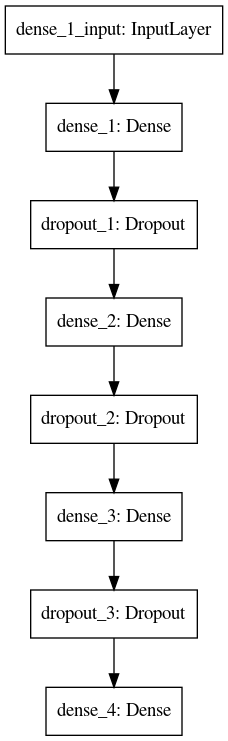

In [3]:
seed = 30
np.random.seed(seed)


w = [12,8,2,1]
suma = 0
for i in range(len(w)):
    if i == 0:
        suma += w[0]*59
    elif i != len(w)-1:
        suma += w[i]*(w[i-1]+1)
    else:
        suma += w[i-1]+w[i]
#     print(suma)
        
srednia = suma/1228
wycznacz_podzial =  round(1-srednia,2)*0.2


print(suma)
print(wycznacz_podzial)

X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=wycznacz_podzial, random_state=seed)

model = create_model()
model.summary()


from keras.callbacks import EarlyStopping, ModelCheckpoint

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=1)]
#     ModelCheckpoint(filepath='best_model.h5', monitor='accuracy', save_best_only=True)]

from keras.utils import plot_model
plot_model(model, to_file='model.png')

# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)

# from pprint import pprint
# pprint(class_weights)

In [4]:
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test,y_test), 
    epochs=15, 
    batch_size=50,
)

Train on 1149 samples, validate on 79 samples
Epoch 1/15
1149/1149 [==============================] - 1s 485us/step - loss: 78.6606 - acc: 0.0104 - val_loss: -76.7744 - val_acc: 0.0000e+00
Epoch 2/15
1149/1149 [==============================] - 0s 51us/step - loss: 120.5574 - acc: 0.0122 - val_loss: -82.1437 - val_acc: 0.0000e+00
Epoch 3/15
1149/1149 [==============================] - 0s 45us/step - loss: 54.0135 - acc: 0.0113 - val_loss: -74.1059 - val_acc: 0.0000e+00
Epoch 4/15
1149/1149 [==============================] - 0s 49us/step - loss: 67.3288 - acc: 0.0122 - val_loss: -80.2112 - val_acc: 0.0000e+00
Epoch 5/15
1149/1149 [==============================] - 0s 44us/step - loss: 121.9755 - acc: 0.0087 - val_loss: -73.4457 - val_acc: 0.0000e+00
Epoch 6/15
1149/1149 [==============================] - 0s 43us/step - loss: 119.1641 - acc: 0.0087 - val_loss: -70.7423 - val_acc: 0.0000e+00
Epoch 7/15
1149/1149 [==============================] - 0s 44us/step - loss: 54.8385 - acc: 0.0113

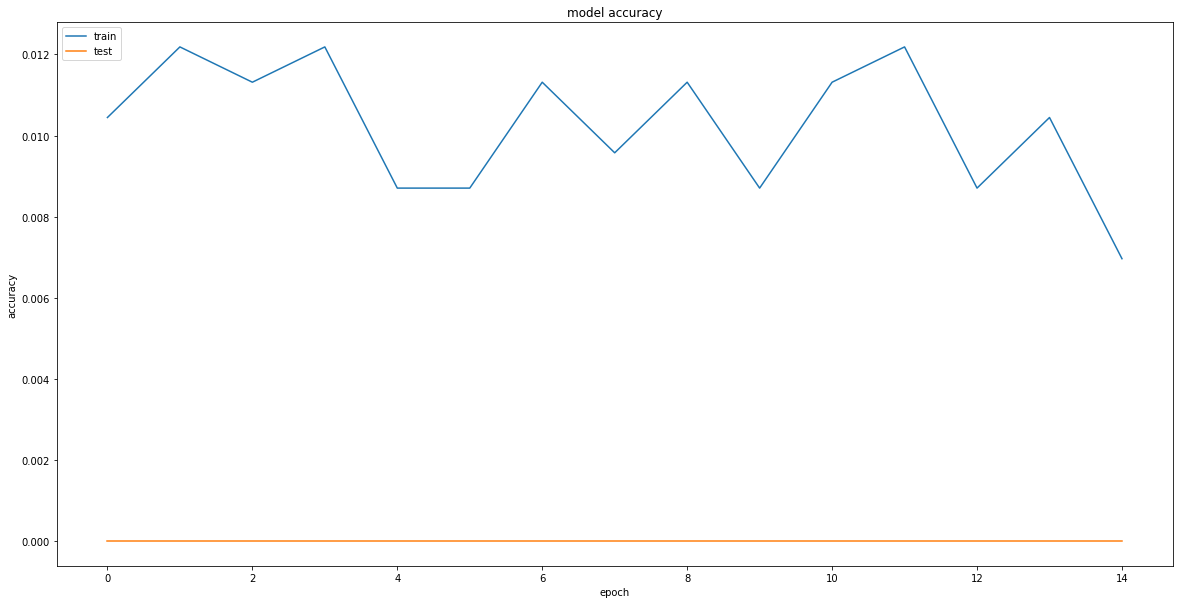

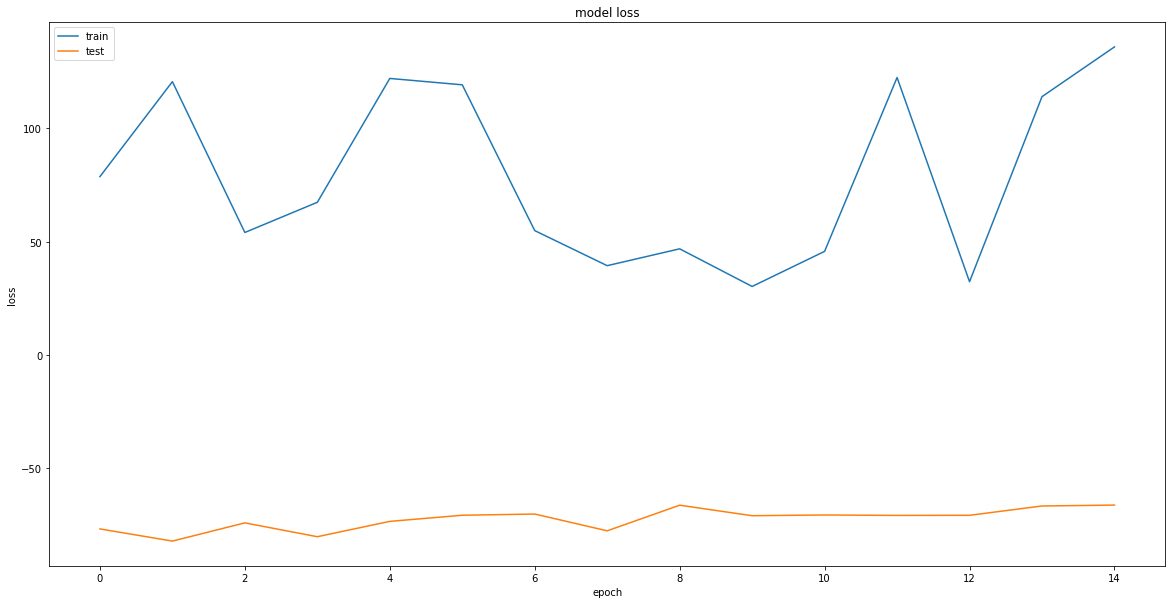

[145.12550672144346, 0.01044386439025402]
acc: 1.04%
[-66.26323011857045, 0.0]
acc: 0.00%
EXPECTED	RECEIVED	x100
  -36.5514	   +0.5317	  +53.1655
  -14.4238	   -0.3437	  -34.3660
  -25.2019	   +0.7595	  +75.9531
  -64.3715	   -0.7125	  -71.2512
  -60.2934	   -0.5376	  -53.7556
  -30.0038	   +0.7435	  +74.3536
  +80.5970	   -0.6675	  -66.7462
  -64.9701	   -0.6814	  -68.1446
  -27.5413	   -0.6849	  -68.4900
   -2.1186	   +0.5317	  +53.1657
   +2.1956	   -0.7575	  -75.7546
   -4.1880	   -0.3099	  -30.9890


In [5]:
plt.rcParams["figure.figsize"] = (20,10)
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


scores = model.evaluate(X_train, y_train, verbose=0) 
print(scores)
print("acc: %.2f%%" % (scores[1]*100))
scores = model.evaluate(X_test, y_test, verbose=0) 
print(scores)
print("acc: %.2f%%" % (scores[1]*100))


d1 =np.array([49.5721,0.0000,0.0000,83.0541,0.6241,0.0000,-89.7227,0.0000,0.0000,32.5643,0.0000,0.0000,0.0000,0.0000,0.0000,0.0111,2.6377,0.0000,0.0000,7.2061,9.7584,0.0000,2.8842,0.0000,0.0000,1.4105,0.0000,0.0000,0.0000,44.1597,0.0000,0.0000,44.1595,44.1756,0.0000,-49.9617,0.0000,0.0000,-70.8841,0.0000,0.0000,0.0000,0.0000,0.0000,45.0450,43.4849,0.0000,0.0000,181.2090,0.0000,0.0000,26.5169,0.0000,0.0000,269.1953,0.0000,0.0000,0.0000])
d2 =np.array([1.4556,0.0000,0.0000,57.2784,0.0000,0.0000,7.3803,0.0000,0.0000,18.1696,0.0000,0.0000,0.0000,0.0000,6.2529,0.0012,0.0000,2.5935,0.0000,0.5484,0.0000,0.0000,5.4752,0.0000,0.5931,0.1399,0.0000,0.1118,0.0000,3.9709,0.0000,0.0000,-41.2864,0.0000,0.0000,8.4048,0.0000,0.0000,-67.8837,0.0000,0.0000,0.0000,0.0000,7.4190,383.3333,0.0000,-0.2236,0.0000,357.2392,0.0000,0.0000,60.4982,0.0000,272.3150,424.0172,0.0000,-4.3828,0.0000,])
d3 =np.array([7.8772,0.0000,0.0000,24.4345,3.3660,0.0000,5.2519,0.0000,0.0000,7.1123,0.0000,0.0000,0.0000,0.5611,1.6168,0.0000,0.0851,3.7637,0.0000,21.4743,0.0000,0.0000,19.2162,1.7287,0.0000,0.0162,3.1032,0.3927,0.0000,0.2133,0.0000,0.0000,7.1604,-0.0446,0.0000,176.2257,0.0000,0.0000,-37.6446,0.0000,0.0000,0.0000,-27.9808,-27.5544,0.0000,-13.6310,-9.9795,0.0000,-26.0907,0.0000,0.0000,-21.9263,19.4134,0.0000,-15.4321,21.1427,0.0509,0.0000])
d4 =np.array([0.7612,0.0000,0.0000,33.6160,0.0000,0.0000,-0.3149,0.0000,0.0000,25.4086,0.0000,0.0000,0.0000,0.1151,0.2208,0.0000,0.0202,0.0000,0.0000,6.2495,0.0000,0.0000,23.8427,2.4167,6.7324,0.1203,0.8105,0.0008,0.0000,-0.5255,0.0000,0.0000,-2.0148,0.0000,0.0000,-2372.0864,0.0000,0.0000,-98.1872,0.0000,0.0000,0.0000,2.1720,-37.4547,0.0000,0.0000,0.0000,0.0000,395.2508,0.0000,0.0000,-8.8732,3.7282,11.9422,36.5752,1118.8649,187.5000,0.0000])
d5 =np.array([17.0886,0.0000,-41.5568,0.0000,0.0000,18.7611,97.0877,0.0000,0.0000,6.0026,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5659,0.0000,0.0000,1.8557,0.0000,0.0000,0.1952,0.0000,0.0000,0.0000,114.3991,0.0000,0.0000,0.0000,0.0000,168.4171,-114.7866,0.0000,0.0000,253.6101,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,216.5577,0.0000,0.0000,99.0300,0.0000,0.0000,232.8381,0.0000,0.0000,0.0000])
d6 =np.array([30.2288,0.0000,0.0000,51.7629,-0.0215,2.1568,-40.4181,0.0000,0.0000,16.8416,0.0000,0.0293,0.0000,1.8614,2.6048,0.6720,0.0000,0.0000,0.0000,2.1321,0.0000,0.0869,13.9525,1.5124,2.8103,6.0151,7.7726,0.0000,0.0000,48.4131,0.0000,0.0000,48.4134,-1035.3488,48.4097,-40.4730,0.0000,0.0000,-48.2638,0.0000,0.0000,0.0000,55.2165,42.0915,33.6905,0.0000,0.0000,0.0000,-62.8770,0.0000,-34.9827,-44.3053,38.8720,-50.0160,-51.5453,-94.2426,0.0000,0.0000])
d7 =np.array([41.0464,0.0000,0.0000,82.2618,0.0000,0.0000,-125.4647,0.0000,0.0000,83.5618,0.0000,0.0000,0.0000,0.0527,0.3210,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.6595,0.1899,0.0000,0.0172,12.1142,0.2402,0.0000,-37.0052,0.0000,0.0000,-37.0050,0.0000,0.0000,65.2752,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-94.1176,1488.1931,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,878.0369,-69.0890,0.0000,0.0000,-57.9931,-60.4913,0.0000])
d8 =np.array([2.4361,0.0000,-0.0424,46.4519,4.0558,0.0000,2.5693,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.8338,0.0000,0.0000,12.2636,0.0000,0.0000,17.7043,1.7062,1.9115,3.1406,0.8036,2.1657,0.0000,-11.4117,0.0000,11.5566,-2.1732,-11.9212,0.0000,-172.8720,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-31.3004,0.0000,0.0000,9.6880,0.0000,0.0000,36.8956,-1.8579,38.5352,-16.2803,1.2568,-9.3780,0.0000])
d9 =np.array([1.6722,0.0000,-0.7812,27.2519,0.0000,0.0000,32.7353,0.0000,0.0000,2.5775,0.0000,0.0000,0.0000,0.2149,0.0000,2.1944,2.1337,0.0000,0.0000,1.6850,0.0000,0.0000,21.7058,4.8099,0.0000,1.1530,2.6477,0.0000,0.0000,-27.5505,0.0000,27.5474,-27.5522,0.0000,0.0000,-27.0744,0.0000,0.0000,-5.6760,0.0000,0.0000,0.0000,-16.1936,0.0000,-45.6252,-43.2488,0.0000,0.0000,9.9941,0.0000,0.0000,99.6342,-29.2064,0.0000,-45.2905,-47.0522,0.0000,0.0000])
d10 =np.array([1.4269,0.0000,0.0000,6.3156,0.0000,-12.2964,15.7707,0.0000,0.0000,30.5627,0.0000,0.0000,0.0000,2.5386,0.0000,0.0000,0.0000,0.0000,0.0000,4.6097,0.0000,0.0000,50.6423,0.1912,0.0000,0.2388,0.0000,0.0000,0.0000,1.1984,0.0000,0.0000,1.1970,0.0000,-0.1155,-12.6190,0.0000,0.0000,-8.0022,0.0000,0.0000,0.0000,7.0157,0.0000,0.0000,0.0000,0.0000,0.0000,18.4047,0.0000,0.0000,1.4375,25.2092,0.0000,135.7621,0.0000,0.0000,0.0000])
d11 = np.array([13.3871,0.0000,0.0000,4.7313,0.0000,0.0000,24.1641,0.0000,0.0000,7.6074,0.0000,0.0000,0.0000,0.2109,4.0650,0.7091,0.0000,0.0000,0.0000,1.6810,0.0000,0.0000,7.3874,0.0000,8.0384,0.9475,0.7213,26.3494,0.0000,-13.0559,0.0000,0.0000,320.2904,0.0000,0.0000,-49.8086,0.0000,0.0000,-48.2662,0.0000,0.0000,0.0000,10.8582,-62.1501,0.0000,0.0000,0.0000,0.0000,201.1481,0.0000,0.0000,104.5713,0.0000,-50.2799,-41.9420,81.6304,-26.9126,0.0000])
ztreningu = np.array([0.1804,0.0000,0.0000,6.1296,0.1019,3.2988,19.4857,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5368,0.0000,0.0000,0.0000,0.0000,11.9971,0.0000,0.0000,57.5271,0.0441,0.6985,0.0000,0.0000,0.0000,0.0000,-16.5188,0.0000,0.0000,-14.0580,0.0000,-14.1809,0.1889,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-48.2489,0.0000,0.0000,0.0000,0.0000,-50.1146,0.0000,0.0000,12.9624,32.4263,-15.1324,0.0000,0.0000,0.0000,0.0000])



expected = [-36.5514,-14.4238,-25.2019,-64.3715,-60.2934,-30.0038,80.5970,-64.9701,-27.5413,-2.1186,2.1956,-4.1880]

i=0

print('EXPECTED\tRECEIVED\tx100')
for data in [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,ztreningu]:
    znak = 1
    received=model.predict(data.reshape(1,58),batch_size =1)[0][0]
    print('%+10.4f\t%+10.4f\t%+10.4f'%(expected[i],received,received*100))
    i+=1

# col_width = 10  # padding
# for row in data:
#     print (row.rjust(50, '0'))

In [6]:
from datetime import datetime
from pathlib import Path
Path('saved_models').mkdir(parents=True, exist_ok=True)

outputfilename = 'saved_models/vec58B_'+ str(datetime.now().strftime('%H:%M:%S'))
# serialize model to JSON
model_json = model.to_json()
with open(outputfilename+".json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(outputfilename+".h5")
print("Saved model to disk")

Saved model to disk
